In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.read_csv('../data/titanic.csv')

In [10]:
df['family_size'] = df['SibSp'] + df['Parch']

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
np.where(df['Age'] > 35, 'Old', 'Young')

array(['Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Old', 'Young',
       'Young', 'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Old',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Old',
       'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Young', 'Young',
       'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Old',
       'Young', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Old', 'Old', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',
       'Young', 'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Old',
       'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young',


In [22]:
conditions = [
    (df['Sex'] == 'male') & (df['Age'] >= 35),
    (df['Sex'] == 'male') & (df['Age'] < 35),
    (df['Sex'] == 'female') & (df['Age'] >= 35),
    (df['Sex'] == 'female') & (df['Age'] < 35)
]

result = [
    'old man',
    'young man',
    'old woman',
    'young woman'
]

In [23]:
df['age_status'] = np.select(conditions, result, 'not found')

In [75]:
%timeit df['age_status'] = np.select(conditions, result, 'not found')

186 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
df['age_status']

0        young man
1        old woman
2      young woman
3        old woman
4          old man
5        not found
6          old man
7        young man
8      young woman
9      young woman
10     young woman
11       old woman
12       young man
13         old man
14     young woman
15       old woman
16       young man
17       not found
18     young woman
19       not found
20         old man
21       young man
22     young woman
23       young man
24     young woman
25       old woman
26       not found
27       young man
28       not found
29       not found
          ...     
861      young man
862      old woman
863      not found
864      young man
865      old woman
866    young woman
867      young man
868      not found
869      young man
870      young man
871      old woman
872      young man
873        old man
874    young woman
875    young woman
876      young man
877      young man
878      not found
879      old woman
880    young woman
881      young man
882    young

In [41]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
emb_map = {
    'S': 1,
    'C': 2,
    'Q': 3
}

In [43]:
df['Embarked'] = df['Embarked'].map(emb_map)

In [45]:
df['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [57]:
df['ticket_type'] = pd.cut(df['Fare'],
                           bins = [0, 15, 65, 513],
                           labels = ['comfort +', 'biz markie', 'ultra'])

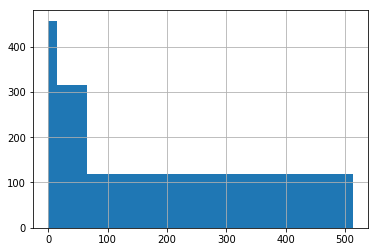

In [67]:
df['Fare'].hist(bins = [0, 15, 65, 513])

In [66]:
df['ticket_type'].value_counts()

comfort +     443
biz markie    317
ultra         116
Name: ticket_type, dtype: int64

In [72]:
def some_funk(age):
    if age % 2:
        result = 'odd'
    else:
        result = 'even'
    return result

In [73]:
df['odd_even'] = df['Age'].apply(some_funk)

In [78]:
%timeit df['odd_even'] = df['Age'].apply(some_funk)

448 µs ± 8.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [74]:
df[['Age','odd_even']]

,Age,odd_even
0,22.0,even
1,38.0,even
2,26.0,even
3,35.0,odd
4,35.0,odd
5,NaN,odd
6,54.0,even
7,2.0,even
8,27.0,odd
9,14.0,even


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
family_size    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [16]:
df[df['Cabin'].isnull()]['Name']

0                                Braund, Mr. Owen Harris
2                                 Heikkinen, Miss. Laina
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Williams, Mr. Charles Eugene
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                               Masselmani, Mrs. Fatima
20                                  Fynney, Mr. Joseph J
22                           McGowan, Miss. Anna "Annie"
24                         Pals

In [63]:
for i in df.index[:20]:
    null_count_row = df.iloc[i].isnull().sum()
    if null_count_row > 0:
        print(df.loc[i,'Name'],
              '\nNULL FIELDS:',
              df.loc[i, df.iloc[i].isnull()].index.tolist(), "\n")

Braund, Mr. Owen Harris 
NULL FIELDS: ['Cabin'] 

Heikkinen, Miss. Laina 
NULL FIELDS: ['Cabin'] 

Allen, Mr. William Henry 
NULL FIELDS: ['Cabin'] 

Moran, Mr. James 
NULL FIELDS: ['Age', 'Cabin'] 

Palsson, Master. Gosta Leonard 
NULL FIELDS: ['Cabin'] 

Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 
NULL FIELDS: ['Cabin'] 

Nasser, Mrs. Nicholas (Adele Achem) 
NULL FIELDS: ['Cabin'] 

Saundercock, Mr. William Henry 
NULL FIELDS: ['Cabin'] 

Andersson, Mr. Anders Johan 
NULL FIELDS: ['Cabin'] 

Vestrom, Miss. Hulda Amanda Adolfina 
NULL FIELDS: ['Cabin'] 

Hewlett, Mrs. (Mary D Kingcome)  
NULL FIELDS: ['Cabin'] 

Rice, Master. Eugene 
NULL FIELDS: ['Cabin'] 

Williams, Mr. Charles Eugene 
NULL FIELDS: ['Age', 'Cabin'] 

Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) 
NULL FIELDS: ['Cabin'] 

Masselmani, Mrs. Fatima 
NULL FIELDS: ['Age', 'Cabin'] 

